# Итоговая домашняя работа.
## Вот раньше кино снимали...

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("movies_stats.csv")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [17]:
years_list = list(range(1950, 2011))

In [18]:
def production_year(title, years=years_list):
    default_year = 1900
    
    for year in years:
        if str(year) in title:
            return year

    return default_year
    

In [19]:
df['year'] = df['title'].apply(production_year)
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


In [35]:
rating_df = df.groupby("year", as_index=False)["rating"].mean()
sorted_df = rating_df.sort_values('rating', ascending=False, ignore_index=True)
print(sorted_df)

    year    rating
0   1957  4.014241
1   1972  4.011136
2   1952  4.000000
3   1954  3.994220
4   1951  3.983539
..   ...       ...
57  2005  3.448434
58  2003  3.444777
59  1996  3.426600
60  1997  3.415764
61  2000  3.356104

[62 rows x 2 columns]


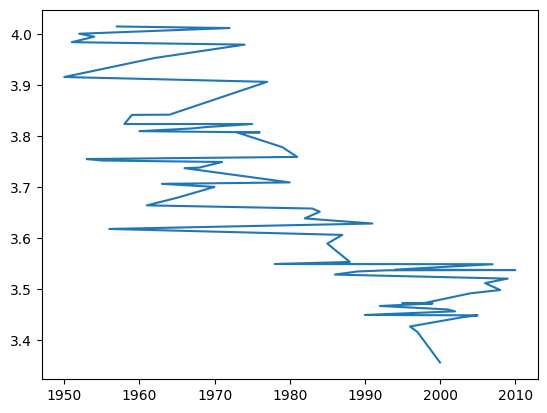

In [38]:
# Уберем из датафрейма фильмы не из диапазона годов (1950, 2010)
sorted_df = sorted_df[sorted_df['year'] != 1900]

import matplotlib.pyplot as plt
plt.plot(sorted_df['year'], sorted_df['rating'])

### Однозначно по графику сказать нельзя, но очень похоже, что с годами рейтинг падает. Дополнительно посчитаем коэффициенты корреляции признаков.

In [42]:
sorted_df.corr()

,year,rating
year,1.00000,-0.82309
rating,-0.82309,1.00000


## Выводы
Учитывая коэф. корреляции `~0.82` можно утверждать, что действительно средний рейтинг фильмов с годами становится ниже.
Но, возможно, стоило бы проанализировать данные по количеству оценок фильмов. В предоставленном файле таких данных нет.